# Big Data Mart Sales Problem

Data Description.

Importing Required Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Loading Dataset.

In [3]:
df=pd.read_csv('Mart_sales.csv')
df1=pd.read_csv('mart_test.csv')

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
print(df.shape)
print(df1.shape)

(8523, 12)
(5681, 11)


In [12]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
df.dtypes    #checking the data type.

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Checking for Null values. 

In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

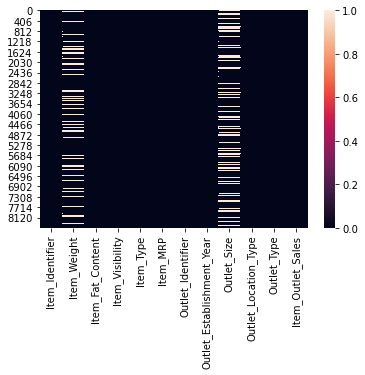

In [16]:
sns.heatmap(df.isnull())
plt.show()

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Statistical Summary.

In [20]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Data Analysis.

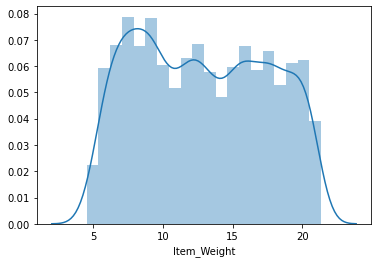

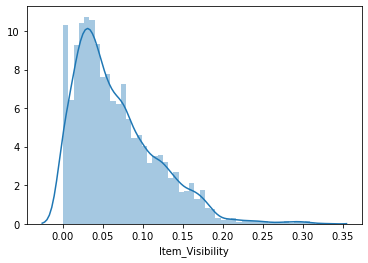

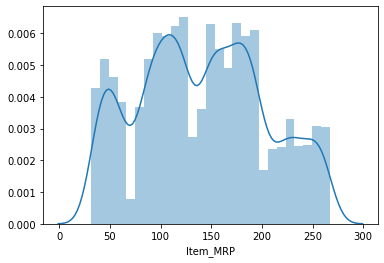

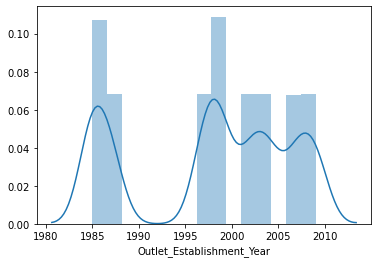

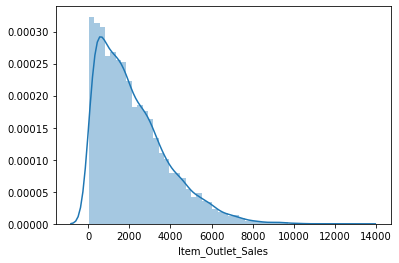

In [21]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

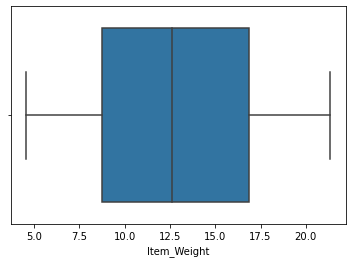

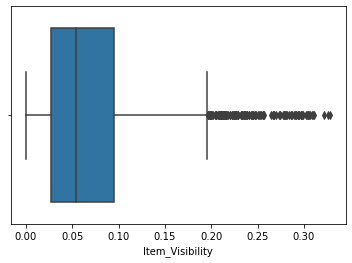

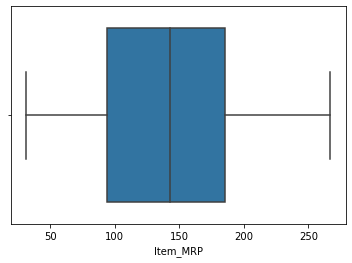

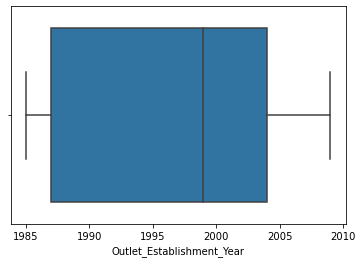

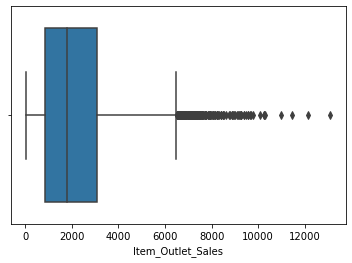

In [23]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

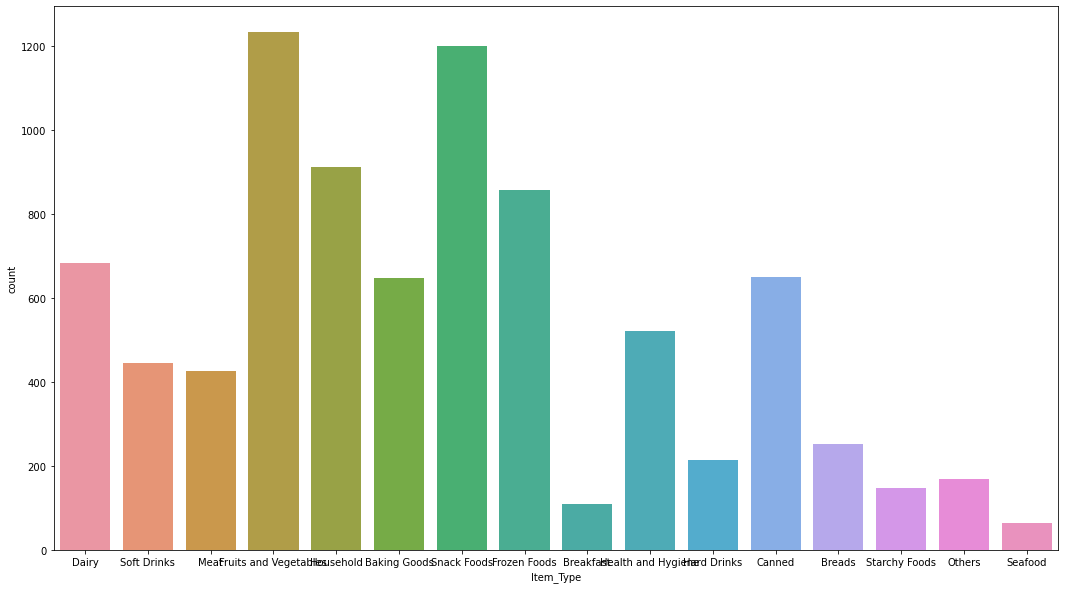

In [24]:
plt.figure(figsize=(18,10))
sns.countplot(df.Item_Type)
plt.show()

In [25]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

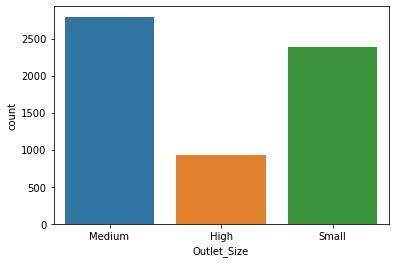

In [26]:
sns.countplot(df['Outlet_Size'])
plt.show()

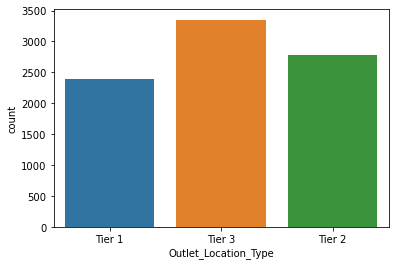

In [27]:
sns.countplot(df['Outlet_Location_Type'])
plt.show()

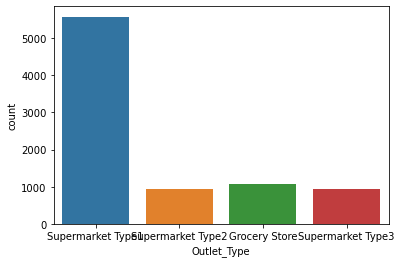

In [28]:
sns.countplot(df['Outlet_Type'])
plt.show()

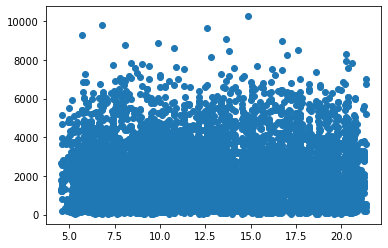

In [29]:
plt.scatter(df['Item_Weight'],df['Item_Outlet_Sales'])
plt.show()

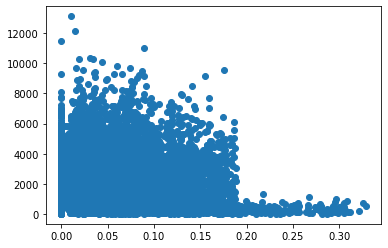

In [30]:
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
plt.show()

In [31]:
corr=df.corr()

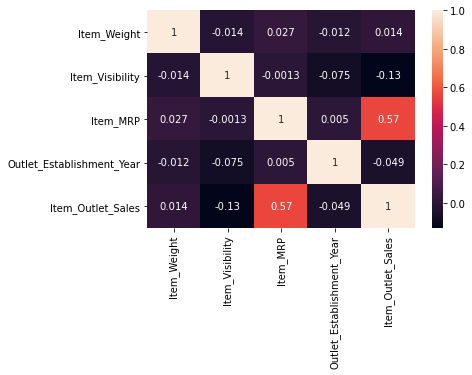

In [32]:
sns.heatmap(corr,annot=True)
plt.show()

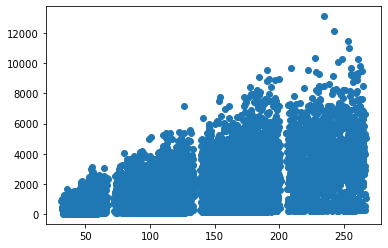

In [33]:
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.show()

Feature Engineering and Transformation. 

In [34]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [35]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(),inplace = True)

In [38]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [39]:
df1['Outlet_Size'].mode()

0    Medium
dtype: object

In [40]:
df['Outlet_Size'].fillna('Medium',inplace = True)

In [41]:
df1['Outlet_Size'].fillna('Medium',inplace = True)

Dealing Categorical Variables.

Label Encoding.

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [44]:
df1['Item_Fat_Content']=le.fit_transform(df1['Item_Fat_Content'])
df1['Item_Type']=le.fit_transform(df1['Item_Type'])
df1['Outlet_Location_Type']=le.fit_transform(df1['Outlet_Location_Type'])
df1['Outlet_Type']=le.fit_transform(df1['Outlet_Type'])
df1['Outlet_Size']=le.fit_transform(df1['Outlet_Size'])

In [46]:
x=df.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [47]:
x1=df1.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

Linear Regression.

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [50]:
lr_pred=lr.predict(x1)

In [51]:
lr_pred

array([2103.71534789, 1511.64680857, 2217.59720899, ..., 1770.89903817,
       3436.60583575, 1177.30281358])

In [53]:
lr_accuracy=round(lr.score(x,y)*100)
lr_accuracy

51.0

In [ ]:
We are getting accuracy score of 51%.